In [35]:
!python --version

Python 3.10.12


# On-Balance Volume (OBV)

[https://www.investopedia.com/articles/active-trading/041814/four-most-commonlyused-indicators-trend-trading.asp](https://www.investopedia.com/articles/active-trading/041814/four-most-commonlyused-indicators-trend-trading.asp)

Volume itself is a valuable indicator, and on-balance volume (OBV) takes a significant amount of volume information and compiles it into a single one-line indicator. The indicator measures cumulative buying and selling pressure by adding the volume on "up" days and subtracting volume on "down" days.

Ideally, the volume should confirm trends. A rising price should be accompanied by a rising OBV; a falling price should be accompanied by a falling OBV.

If OBV is rising and the price isn't, it's likely that the price will follow the OBV in the future and start rising. If the price is rising and OBV is flat-lining or falling, the price may be near a top. If the price is falling and OBV is flat-lining or rising, the price could be nearing a bottom.

O Volume On-Balance (OBV) é como um amigo que te conta se o mercado está comprando ou vendendo mais. Se o preço está subindo e o OBV também, é bom sinal. Significa que mais pessoas estão comprando. Se o preço sobe, mas o OBV fica parado ou cai, pode ser um sinal de que a compra está diminuindo e o preço pode cair em breve. Da mesma forma, se o preço está caindo e o OBV está parado ou aumentando, pode ser um sinal de que a venda está diminuindo e o preço pode subir em breve. Em resumo, o OBV ajuda a entender se a força do mercado está a favor dos compradores ou dos vendedores.

# pip

In [36]:
!pip install -U git+https://github.com/iqoptionapi/iqoptionapi.git

  Cloning https://github.com/iqoptionapi/iqoptionapi.git to /tmp/pip-req-build-z4f8pvlh
  Running command git clone --filter=blob:none --quiet https://github.com/iqoptionapi/iqoptionapi.git /tmp/pip-req-build-z4f8pvlh
  Resolved https://github.com/iqoptionapi/iqoptionapi.git to commit 8a903cc094a74af1ed935a56a2d6b5a9ed3319d7
  Preparing metadata (setup.py) ... done


In [37]:
!pip install python_dotenv

# Importando bibliotecas

In [38]:
import logging

In [39]:
from os import getenv

In [40]:
from dotenv import load_dotenv

In [41]:
from iqoptionapi.stable_api import IQ_Option

In [42]:
from time import time

In [43]:
import pandas as pd

In [44]:
import numpy as np

In [45]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Configurações iniciais

In [46]:
load_dotenv()

True

In [47]:
iqoption_email = getenv('my_email')

In [48]:
iqoption_password = getenv('my_password')

In [49]:
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s %(message)s')
Iq = IQ_Option(iqoption_email, iqoption_password)

In [50]:
check, reason = Iq.connect()
check, reason

(True, None)

In [51]:
goal = 'EURUSD'

# Carregando informações de velas

In [52]:
velas = Iq.get_candles(goal, 60, 111, time())

In [53]:
df = pd.DataFrame(velas)

In [54]:
df

,id,from,at,to,open,close,min,max,volume
0,2389098,1711053480,1711053540000000000,1711053540,1.085905,1.085850,1.085825,1.085905,92
1,2389099,1711053540,1711053600000000000,1711053600,1.085840,1.085865,1.085820,1.085865,94
2,2389100,1711053600,1711053660000000000,1711053660,1.085865,1.085850,1.085835,1.085870,81
3,2389101,1711053660,1711053720000000000,1711053720,1.085860,1.085855,1.085790,1.085865,125
4,2389102,1711053720,1711053780000000000,1711053780,1.085855,1.085815,1.085795,1.085865,128
...,...,...,...,...,...,...,...,...,...
106,2389204,1711059840,1711059900000000000,1711059900,1.086155,1.086115,1.086100,1.086170,97
107,2389205,1711059900,1711059960000000000,1711059960,1.086120,1.086080,1.086080,1.086120,81
108,2389206,1711059960,1711060020000000000,1711060020,1.086080,1.086095,1.086080,1.086110,93
109,2389207,1711060020,1711060080000000000,1711060080,1.086095,1.086095,1.086075,1.086115,89


# A coluna 'at' contém registros de data e hora no formato de hora Unix, convertendo para datetime

[https://www.unixtimestamp.com/](https://www.unixtimestamp.com/)

In [55]:
df['at'] = pd.to_datetime(df['at'], unit='ns')
df

,id,from,at,to,open,close,min,max,volume
0,2389098,1711053480,2024-03-21 20:39:00,1711053540,1.085905,1.085850,1.085825,1.085905,92
1,2389099,1711053540,2024-03-21 20:40:00,1711053600,1.085840,1.085865,1.085820,1.085865,94
2,2389100,1711053600,2024-03-21 20:41:00,1711053660,1.085865,1.085850,1.085835,1.085870,81
3,2389101,1711053660,2024-03-21 20:42:00,1711053720,1.085860,1.085855,1.085790,1.085865,125
4,2389102,1711053720,2024-03-21 20:43:00,1711053780,1.085855,1.085815,1.085795,1.085865,128
...,...,...,...,...,...,...,...,...,...
106,2389204,1711059840,2024-03-21 22:25:00,1711059900,1.086155,1.086115,1.086100,1.086170,97
107,2389205,1711059900,2024-03-21 22:26:00,1711059960,1.086120,1.086080,1.086080,1.086120,81
108,2389206,1711059960,2024-03-21 22:27:00,1711060020,1.086080,1.086095,1.086080,1.086110,93
109,2389207,1711060020,2024-03-21 22:28:00,1711060080,1.086095,1.086095,1.086075,1.086115,89


# Transformando a coluna 'at' no index

In [56]:
df = df.set_index(pd.DatetimeIndex(df['at'].values))
df

,id,from,at,to,open,close,min,max,volume
2024-03-21 20:39:00,2389098,1711053480,2024-03-21 20:39:00,1711053540,1.085905,1.085850,1.085825,1.085905,92
2024-03-21 20:40:00,2389099,1711053540,2024-03-21 20:40:00,1711053600,1.085840,1.085865,1.085820,1.085865,94
2024-03-21 20:41:00,2389100,1711053600,2024-03-21 20:41:00,1711053660,1.085865,1.085850,1.085835,1.085870,81
2024-03-21 20:42:00,2389101,1711053660,2024-03-21 20:42:00,1711053720,1.085860,1.085855,1.085790,1.085865,125
2024-03-21 20:43:00,2389102,1711053720,2024-03-21 20:43:00,1711053780,1.085855,1.085815,1.085795,1.085865,128
...,...,...,...,...,...,...,...,...,...
2024-03-21 22:25:00,2389204,1711059840,2024-03-21 22:25:00,1711059900,1.086155,1.086115,1.086100,1.086170,97
2024-03-21 22:26:00,2389205,1711059900,2024-03-21 22:26:00,1711059960,1.086120,1.086080,1.086080,1.086120,81
2024-03-21 22:27:00,2389206,1711059960,2024-03-21 22:27:00,1711060020,1.086080,1.086095,1.086080,1.086110,93
2024-03-21 22:28:00,2389207,1711060020,2024-03-21 22:28:00,1711060080,1.086095,1.086095,1.086075,1.086115,89


# Visualizando os preços

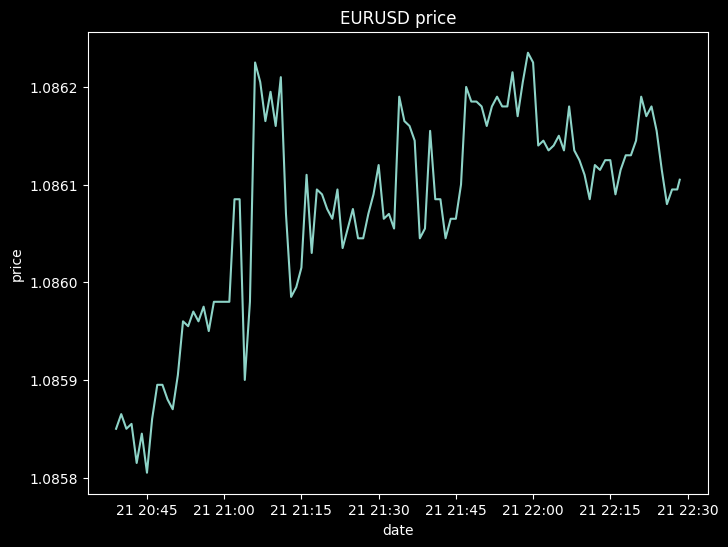

In [57]:
plt.figure(figsize=(8, 6))
plt.plot(df.close, label='close')
plt.title(f'{goal} price')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

# Calculando On-Balance Volume (OBV) - Método 1

In [58]:
df.volume

2024-03-21 20:39:00     92
2024-03-21 20:40:00     94
2024-03-21 20:41:00     81
2024-03-21 20:42:00    125
2024-03-21 20:43:00    128
                      ... 
2024-03-21 22:25:00     97
2024-03-21 22:26:00     81
2024-03-21 22:27:00     93
2024-03-21 22:28:00     89
2024-03-21 22:28:29     40
Name: volume, Length: 111, dtype: int64

In [59]:
df.close

2024-03-21 20:39:00    1.085850
2024-03-21 20:40:00    1.085865
2024-03-21 20:41:00    1.085850
2024-03-21 20:42:00    1.085855
2024-03-21 20:43:00    1.085815
                         ...   
2024-03-21 22:25:00    1.086115
2024-03-21 22:26:00    1.086080
2024-03-21 22:27:00    1.086095
2024-03-21 22:28:00    1.086095
2024-03-21 22:28:29    1.086105
Name: close, Length: 111, dtype: float64

In [60]:
OBV_close = list()
OBV_close.append(0)

# Loop na coluna 'close' do df do segundo registro (index 1) até o final
for i in range(1, len(df.close)):
  if df.close[i] > df.close[i - 1]:
    OBV_close.append(OBV_close[-1] + df.volume[i])
  elif df.close[i] < df.close[i - 1]:
    OBV_close.append(OBV_close[-1] - df.volume[i])
  else:
    OBV_close.append(OBV_close[-1])

# Guardando o OBV (criado na célula anterior) e o OBV Moving Average - OBV EMA - em colunas no df

In [61]:
df['OBV'] = OBV_close

# Cálculo do EMA para o OBV
df['OBV_EMA'] = df['OBV'].ewm(span=20).mean()

df

,id,from,at,to,open,close,min,max,volume,OBV,OBV_EMA
2024-03-21 20:39:00,2389098,1711053480,2024-03-21 20:39:00,1711053540,1.085905,1.085850,1.085825,1.085905,92,0,0.000000
2024-03-21 20:40:00,2389099,1711053540,2024-03-21 20:40:00,1711053600,1.085840,1.085865,1.085820,1.085865,94,94,49.350000
2024-03-21 20:41:00,2389100,1711053600,2024-03-21 20:41:00,1711053660,1.085865,1.085850,1.085835,1.085870,81,13,36.002498
2024-03-21 20:42:00,2389101,1711053660,2024-03-21 20:42:00,1711053720,1.085860,1.085855,1.085790,1.085865,125,138,65.447600
2024-03-21 20:43:00,2389102,1711053720,2024-03-21 20:43:00,1711053780,1.085855,1.085815,1.085795,1.085865,128,10,52.035297
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21 22:25:00,2389204,1711059840,2024-03-21 22:25:00,1711059900,1.086155,1.086115,1.086100,1.086170,97,270,335.985444
2024-03-21 22:26:00,2389205,1711059900,2024-03-21 22:26:00,1711059960,1.086120,1.086080,1.086080,1.086120,81,189,321.986548
2024-03-21 22:27:00,2389206,1711059960,2024-03-21 22:27:00,1711060020,1.086080,1.086095,1.086080,1.086110,93,282,318.178235
2024-03-21 22:28:00,2389207,1711060020,2024-03-21 22:28:00,1711060080,1.086095,1.086095,1.086075,1.086115,89,282,314.732632


# Visualizando o OBV e o OBV EMA

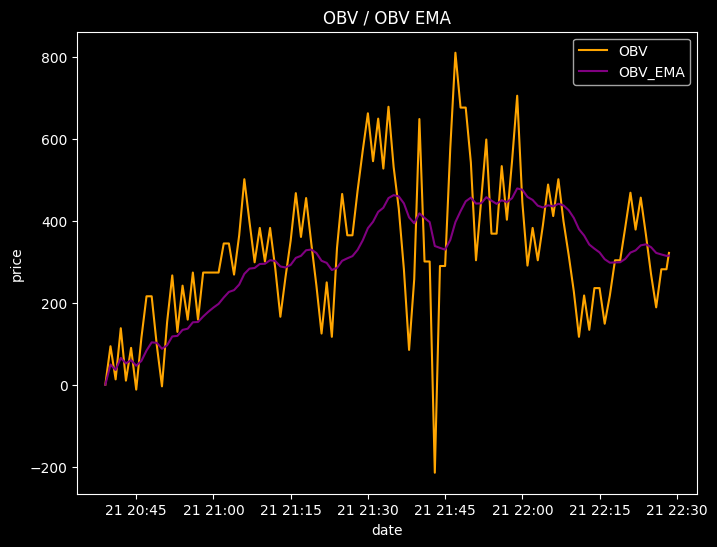

In [62]:
plt.figure(figsize=(8, 6))
plt.plot(df.OBV, label='OBV', color='orange')
plt.plot(df.OBV_EMA, label='OBV_EMA', color='purple')
plt.title('OBV / OBV EMA')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show()

A estratégia consiste em comprar o ativo sempre quando o OBV ultrapassa o OBV EMA

On a similar note, vender o ativo quando o OBV EMA ultrapassa o OBV

# Criando uma função para sinalizar quando comprar e quando vender

If OBV > OBV_EMA then Buy

If OBV < OBV_EMA then Sell

Else Hold 🫸🚨

In [63]:
def comprar_vender_segurar(df, coluna_1, coluna_2):
  sinalizador_comprar = list()
  sinalizador_vender = list()
  sinalizador = -1

  # Loop sobre o tamanho do df
  for i in range (0, len(df)):

    # If OBV > OBV_EMA then Buy (coluna_1 é o OBV, coluna_2 é o OBV_EMA)
    if df[coluna_1][i] > df[coluna_2][i] and sinalizador != 1:
      sinalizador_comprar.append(df['close'][i])
      sinalizador_vender.append(np.nan)
      sinalizador = 1

    # If OBV < OBV_EMA then Sell
    elif df[coluna_1][i] < df[coluna_2][i] and sinalizador != 0:
      sinalizador_vender.append(df['close'][i])
      sinalizador_comprar.append(np.nan)
      sinalizador = 0

    # Else Hold 🫸🚨
    else:
      sinalizador_comprar.append(np.nan)
      sinalizador_vender.append(np.nan)

  return (sinalizador_comprar, sinalizador_vender)

# Criando colunas buy e sell no dataframe

In [64]:
x = comprar_vender_segurar(df, 'OBV', 'OBV_EMA')

df['sinalizador_comprar'] = x[0]
df['sinalizador_vender'] = x[1]

df

,id,from,at,to,open,close,min,max,volume,OBV,OBV_EMA,sinalizador_comprar,sinalizador_vender
2024-03-21 20:39:00,2389098,1711053480,2024-03-21 20:39:00,1711053540,1.085905,1.085850,1.085825,1.085905,92,0,0.000000,NaN,NaN
2024-03-21 20:40:00,2389099,1711053540,2024-03-21 20:40:00,1711053600,1.085840,1.085865,1.085820,1.085865,94,94,49.350000,1.085865,NaN
2024-03-21 20:41:00,2389100,1711053600,2024-03-21 20:41:00,1711053660,1.085865,1.085850,1.085835,1.085870,81,13,36.002498,NaN,1.085850
2024-03-21 20:42:00,2389101,1711053660,2024-03-21 20:42:00,1711053720,1.085860,1.085855,1.085790,1.085865,125,138,65.447600,1.085855,NaN
2024-03-21 20:43:00,2389102,1711053720,2024-03-21 20:43:00,1711053780,1.085855,1.085815,1.085795,1.085865,128,10,52.035297,NaN,1.085815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21 22:25:00,2389204,1711059840,2024-03-21 22:25:00,1711059900,1.086155,1.086115,1.086100,1.086170,97,270,335.985444,NaN,1.086115
2024-03-21 22:26:00,2389205,1711059900,2024-03-21 22:26:00,1711059960,1.086120,1.086080,1.086080,1.086120,81,189,321.986548,NaN,NaN
2024-03-21 22:27:00,2389206,1711059960,2024-03-21 22:27:00,1711060020,1.086080,1.086095,1.086080,1.086110,93,282,318.178235,NaN,NaN
2024-03-21 22:28:00,2389207,1711060020,2024-03-21 22:28:00,1711060080,1.086095,1.086095,1.086075,1.086115,89,282,314.732632,NaN,NaN


# Plotar os preços de compra e venda

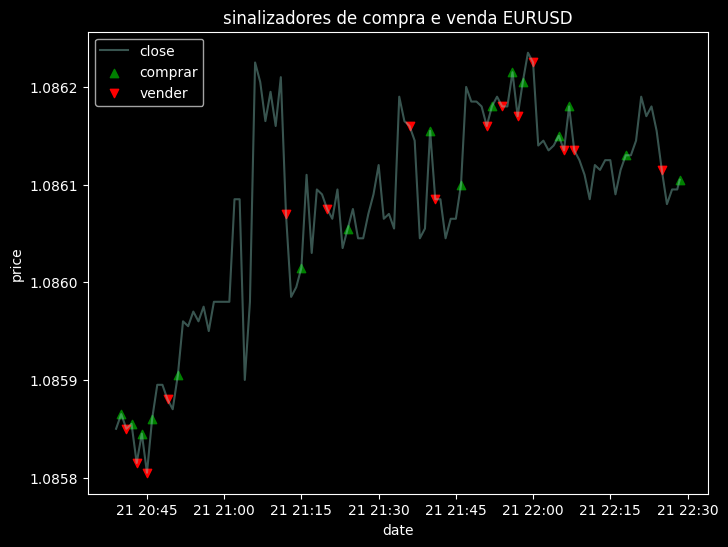

In [65]:
plt.figure(figsize=(8, 6))
plt.plot(df.close, label='close', alpha=0.4)
plt.scatter(df.index, df.sinalizador_comprar, label='comprar', marker='^', color='green')
plt.scatter(df.index, df.sinalizador_vender, label='vender', marker='v', color='red')
plt.title(f'sinalizadores de compra e venda {goal}')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show()

# Importando Plotly

In [66]:
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set default template to 'plotly_dark'

In [67]:
pio.templates.default = 'plotly_dark'

# Figure

In [68]:
# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Plot OBV and OBV EMA in the second subplot
obv_trace = go.Scatter(x=df.index, y=df['OBV'], mode='lines', name='OBV', line=dict(color='orange'))
obv_ema_trace = go.Scatter(x=df.index, y=df['OBV_EMA'], mode='lines', name='OBV_EMA', line=dict(color='purple'))
fig.add_trace(obv_trace, row=2, col=1)
fig.add_trace(obv_ema_trace, row=2, col=1)

# Plot close price in the first subplot
fig.add_trace(go.Scatter(x=df.index, y=df['close'], mode='lines', marker=dict(color='blue'), name='close'), row=1, col=1)

# Plot comprar signals in the first subplot
comprar_x = df.index[df['sinalizador_comprar'].notna()]
comprar_y = df['close'][df['sinalizador_comprar'].notna()]
if len(comprar_x) > 0:
    fig.add_trace(go.Scatter(x=comprar_x, y=comprar_y,
                             mode='markers',
                             marker=dict(symbol='triangle-up', color='green'),
                             name='comprar'), row=1, col=1)

# Plot vender signals in the first subplot
vender_x = df.index[df['sinalizador_vender'].notna()]
vender_y = df['close'][df['sinalizador_vender'].notna()]
if len(vender_x) > 0:
    fig.add_trace(go.Scatter(x=vender_x, y=vender_y,
                             mode='markers',
                             marker=dict(symbol='triangle-down', color='red'),
                             name='vender'), row=1, col=1)

# Update layout
fig.update_layout(title=f'Sinalizadores de compra e venda {goal}',
                  xaxis_title='date',
                  yaxis_title='price',
                  legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
                  height=600, width=800)

fig.show()